Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')


── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 10, 3, 5, 3, 11, 3, 7, 7, 7, 1, …
$ Glucose                  <dbl> 85, 116, 115, 110, 139, 126, 109, 88, 138, 18…
$ BloodPressure            <dbl> 66, 74, 0, 92, 80, 88, 75, 58, 76, 64, 84, 92…
$ SkinThickness            <dbl> 29, 0, 0, 0, 0, 41, 26, 11, 0, 25, 0, 18, 0, …
$ Insulin                  <dbl> 0, 0, 0, 0, 0, 235, 0, 54, 0, 70, 0, 0, 0, 0,…
$ BMI                      <dbl> 26.6, 25.6, 35.3, 37.6, 27.1, 39.3, 36.0, 24.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.201, 0.134, 0.191, 1.441, 0.704, 0.5…
$ Age                      <dbl> 31, 30, 29, 30, 57, 27, 60, 22, 35, 26, 37, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?


**Answer:** The "Outcome" variable would be suitable as an output for a logistic regression model as it represents a binary label (class).

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |  Plasma glucose concentration a 2 hours in an oral glucose tolerance test           
| BMI         |  Body mass index (weight in kg/(height in m)^2)           

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

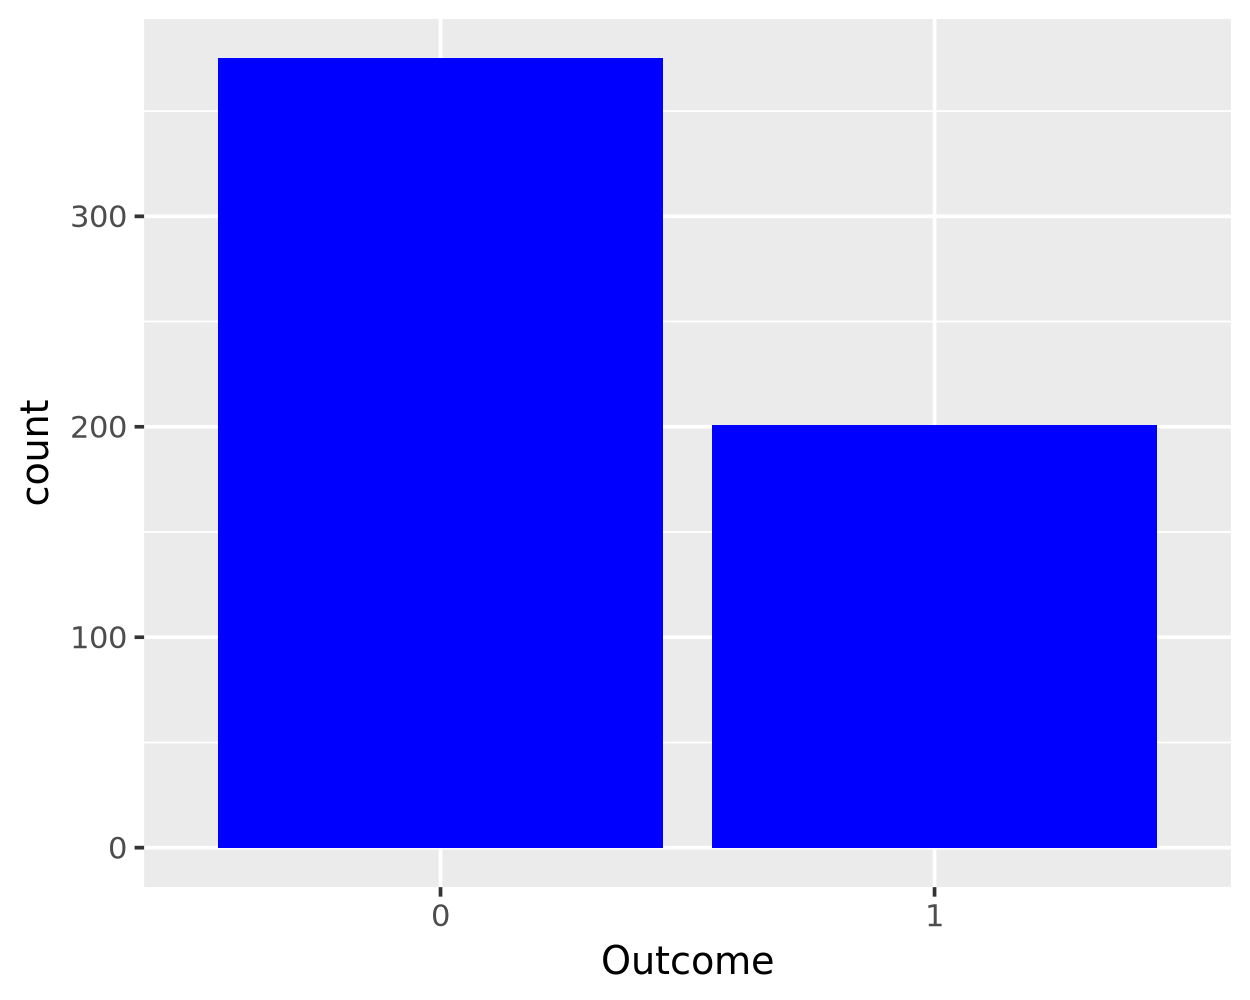

In [4]:
ggplot(diabetes_train, aes(x = Outcome)) +
        geom_bar(fill = 'blue')

❓ Is the data balanced? I.e. do we have equal counts of each outcome?



**Answer:** The data is not balanced. There are almost twice as many "not diabetes" outcomes.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

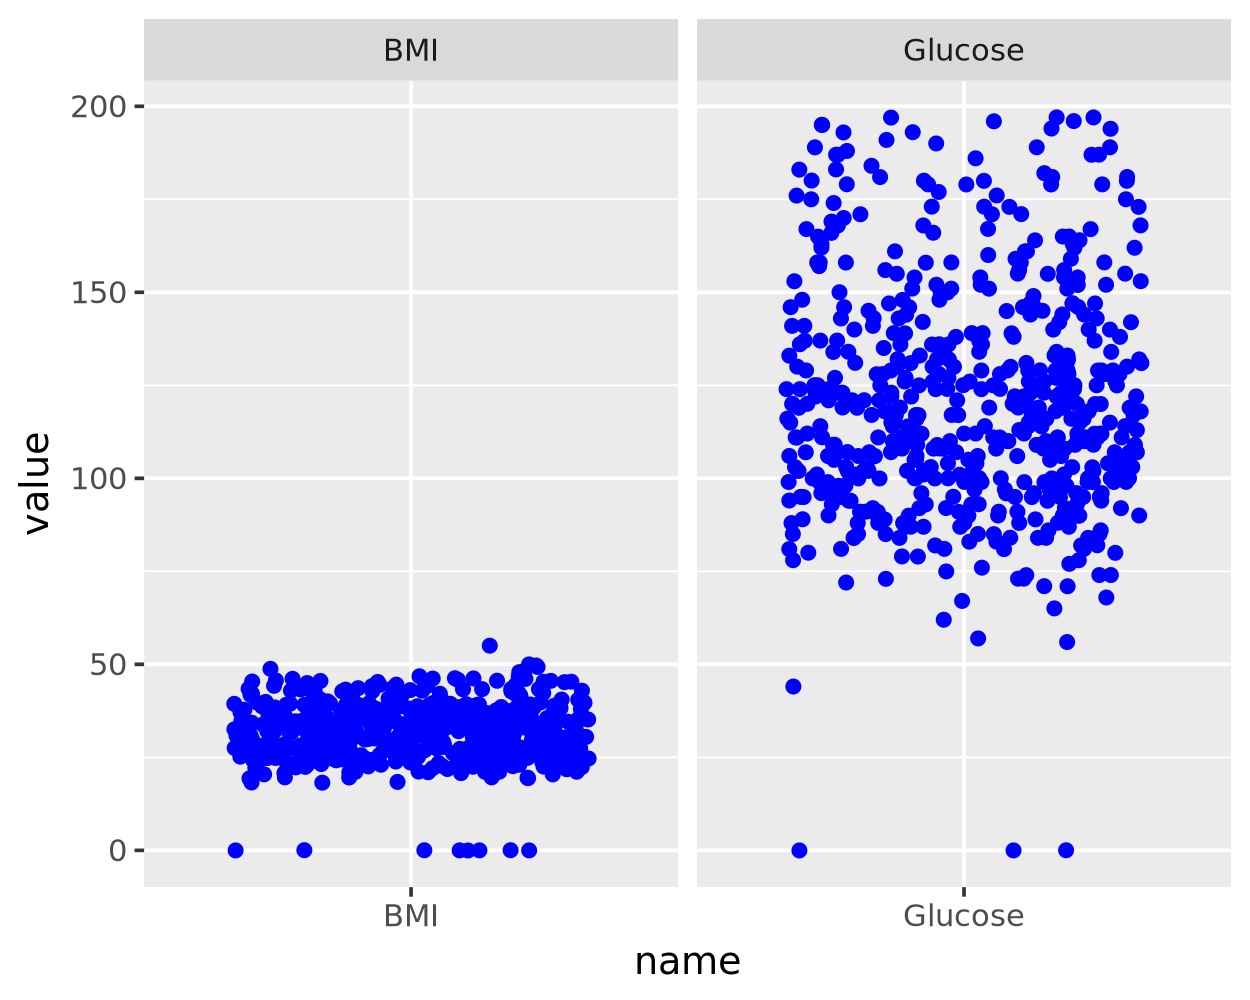

In [6]:
ggplot(plot_df, aes(x = name, y = value)) +
    geom_jitter(color = 'blue') +
        facet_wrap(~name, ncol = 2, scales = 'free_x')
      

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** When you remove the 'scales = 'free_x'' argument from the 'facet_wrap' function, 'BMI' and 'Glucose' appear in the labels at the bottom for both facets and the data points are squished into the appropriate areas of the facets.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [7]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.72854883,0.723356680,-10.684285,1.205747e-26
BMI,0.07871829,0.015682272,5.019572,5.178675e-07
Glucose,0.03615488,0.003855128,9.378388,6.698902e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [8]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [9]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 112  31
         1  13  36

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?



**Answer:** 

Based on the confusion matrix above:
- 67 individuals actually had diabetes
- The model correctly predicted 33 individuals had diabetes
- 11 people were predicted to have diabetes, but did not have it